Grupo 5:

* Juan Carlos Rodríguez Ramírez
* Eduardo Muñoz Lorenzo
* Jorge Gascón Moreno

In [ ]:
%matplotlib inline  
# Figures plotted inside the notebook
%config InlineBackend.figure_format = 'retina'
# High quality figures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
## Load NLTK Modules
import nltk
import string
nltk.download('punkt')
punctuation = string.punctuation
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer  = WordNetLemmatizer()
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer('english')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords   = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Reviews de la base de datos YELP academic

En este homework vamos a trabajar con el [Yelp_academic_dataset](https://www.kaggle.com/yelp-dataset/yelp-dataset) que como sabemos contiene revisiones de negocios y establecimientos en 11 áreas metropolitanas de 4 países recogidas de usuarios del servicio Yelp. 

A diferencia de en la sesión de introducción donde ya usásteis este dataset  con la información de los negocios, aquí nos vamos a centrar en la información de las *reviews* y vamos a predecir el *rating* asociado a cada *review* a partir del contenido textual de estas *reviews*. Ademáás, para facilitar el procesado de los datos, ya que el dataset original contine millones de *reviews*, hemos hecho una seleccion de unas 3500 *reviews* con las que trabajar en este homework.

La siguiente celda de código carga el fichero que hemos preparado para este homework y separa las variables de texto con las reviews (que seran nuestras observaciones de entrada) de las etiquetas o variable objetivo del problema que serán las `starts`.

In [ ]:
reviews_df = pd.read_csv("http://www.tsc.uc3m.es/~vanessa/data_notebooks/yelp/yelp_review_red.csv.zip")
reviews_df.head()

,text,stars
0,"Coconut's Fish Cafe is a fantastic, Five Stars...",4
1,I stopped by at Prime tonight after a grueling...,5
2,This place is unprofessional in every way poss...,1
3,Driving more than an half-hour to get to a gun...,4
4,Four of us met here for lunch so that we could...,5


In [ ]:
reviews=list(reviews_df['text'])
print(len(reviews))
# Get labels
y = reviews_df['stars']

3533


In [ ]:
# Hemos detectado un curioso caso de una review que no está en alfabeto occidental, el cual se limpiara al eliminar las reviews que despues de aplicar el diccionario quedan vacías
reviews[3087]

'太难吃了，牛肉面的肉块里面是凉的，朋友的羊杂面百叶是腥的，点了个烤鱼豆腐，鱼豆腐也没有烤熟，里面也是凉的，服务员态度也不行，一直玩手机，叫了半天没反应，总之味道不行，人也不行，完全不会再去了\n我发了评论以后他们居然威胁我，我现在很担心我的人生安全'

# Ejercicio 1. Preprocesado de texto (2 ptos)

Aplique el pipeline estandar visto en la sesión de NLP (tokenización, homogeneización y limpieza) para el preprocesado de las reviews.

Nota: de este preprocesado elimine el *stemming* y aplique solo la lematización para obtener palabras completas que podamos analizar y utilizar más adelante.


[['coconut', 'fish', 'cafe', 'fantastic', 'five', 'star', 'fish', 'cafe', 'five', 'u', 'drove', 'lunch', 'hour', 'lucky', 'u', 'customer', 'line', 'nice', 'good', 'sign', 'ur', 'working', 'clock', 'ordered', 'póke', 'photo', 'wa', 'outstanding', 'love', 'fresh', 'tuna', 'coconut', 'might', 'best', 'every', 'order', 'see', 'coworkers', 'ordered', 'chicken', 'taco', 'steak', 'taco', 'photo', 'fish', 'taco', 'cup', 'chowder', 'add', 'ipas', 'soft', 'drink', 'averaged', '15', 'tried', 'friend', 'josh', 'fish', 'taco', 'wa', 'great', 'four', 'star', 'review', 'georgie', 'well', 'non', 'fish', 'group', 'thought', 'wa', 'average', 'okay', 'go', 'place', 'called', 'coconut', 'fish', 'cafe', 'order', 'chicken', 'steak', 'sorry', 'lol', 'step', 'away', 'meat', 'taco', 'guy', 'one', 'get', 'hurt', 'order', 'poke', 'fish', 'shrimp', 'taco', 'fall', 'love', 'coconut', 'fish', 'cafe', 'enjoy'], ['stopped', 'prime', 'tonight', 'grueling', '9', 'hour', 'business', 'meeting', 'arrived', 'wa', 'seated',

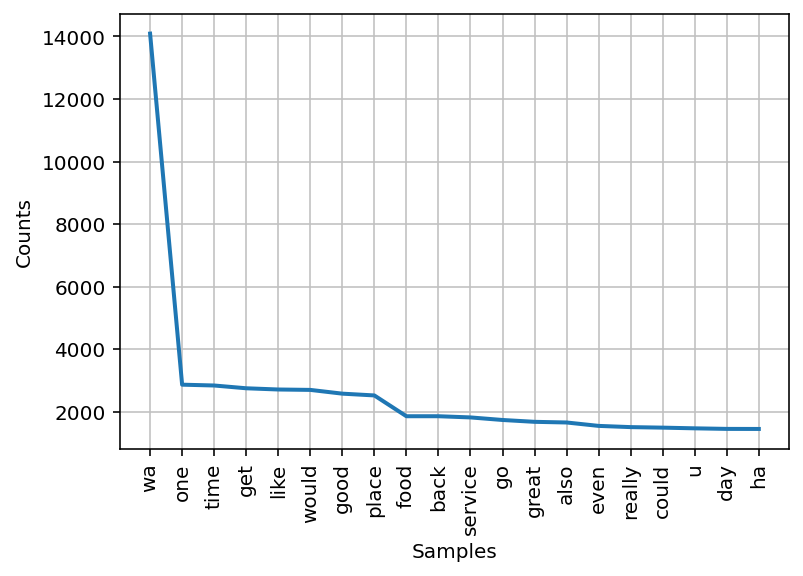

In [ ]:
def normalize(review):
  return [lemmatizer.lemmatize(token.lower()) for token in nltk.word_tokenize(review) 
                if lemmatizer.lemmatize(token.lower()) not in stopwords and token not in punctuation and token.isalnum()]

corpus_prec = [normalize(review) for review in reviews]
print(corpus_prec[:20])
print(len(corpus_prec))
tokens_corpus = [token for doc in corpus_prec for token in doc]
counts  = nltk.FreqDist(tokens_corpus)
counts.plot(20, cumulative=False)

# Ejercicio 2. Vectorización de la información textual (2 ptos)

A partir del contenido preprocesado de las reviews, genere una representación vectorial para cada review. Para esta representacióón utilice:
1. BoW
2. TF-IDF

Como para generar estas representaciones necesita definir un diccionario, antes de generar la representación vectorial, analice el diccionario generado y, con el criterio o criterios que considere más adecuados, limite su tamaño a 1000 términos.


## 2.1 Creacción del diccionario

Al realizar el análisis de frecuencia de las palabras de nuestro diccionario se observa una distribución de cola larga: muchas palabras aparecen con poca frecuencia en el texto.


The dictionary contains 23480 terms
First terms in the dictionary:
0 : 15
1 : add
2 : average
3 : averaged
4 : away
5 : best
6 : cafe
7 : called
8 : chicken
9 : chowder


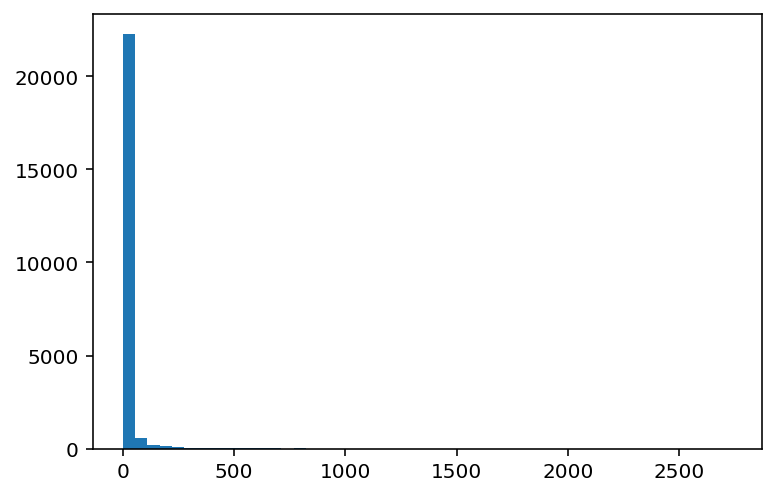

The dictionary contains 1000 terms
First terms in the dictionary:
0 : add
1 : average
2 : away
3 : best
4 : cafe
5 : called
6 : chicken
7 : cup
8 : customer
9 : drink


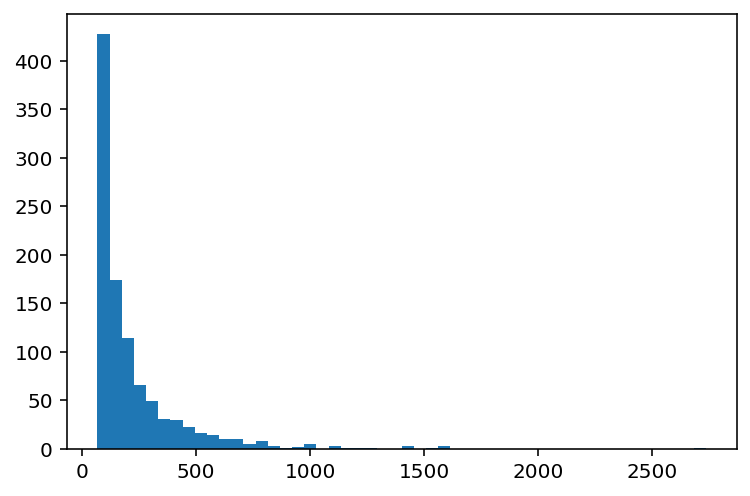

In [ ]:
import gensim

#<SOL>
# Create dictionary of tokens: the input is the preprocessed corpus 
D = gensim.corpora.Dictionary(corpus_prec)
n_tokens = len(D)
print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])
# Analize the word frequency per document 
plt.hist(D.dfs.values(),50)
plt.show()

# Eliminamos los términos que son números o que solo tienen una letra
bad_ids = [n for n in range(len(D)) if (D[n].isdigit()) or (D[n].isalpha() and len(D[n])==1)]
D.filter_tokens(bad_ids=bad_ids)  

# Filter extremes
# Se filtran los términos que aparecen más de un 80% en todo el corpus con el parámetro no_above
# El segundo criterio aplicado es n_keep = 1000 para quedarnos con el nº de términos indicados
# No filtramos por el umbral inferior por lo que no asignamos valor a no_below
no_above=0.8
D.filter_extremes(no_above=no_above, keep_n = 1000)

n_tokens = len(D)
print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])
# Analize the word frequency per document 
plt.hist(D.dfs.values(),50)
plt.show()



#</SOL>

## 2.2 Representación BoW
Obtenga la representación BoW de las reviews preprocesadas.

Original document (after cleaning):
['coconut', 'fish', 'cafe', 'fantastic', 'five', 'star', 'fish', 'cafe', 'five', 'u', 'drove', 'lunch', 'hour', 'lucky', 'u', 'customer', 'line', 'nice', 'good', 'sign', 'ur', 'working', 'clock', 'ordered', 'póke', 'photo', 'wa', 'outstanding', 'love', 'fresh', 'tuna', 'coconut', 'might', 'best', 'every', 'order', 'see', 'coworkers', 'ordered', 'chicken', 'taco', 'steak', 'taco', 'photo', 'fish', 'taco', 'cup', 'chowder', 'add', 'ipas', 'soft', 'drink', 'averaged', '15', 'tried', 'friend', 'josh', 'fish', 'taco', 'wa', 'great', 'four', 'star', 'review', 'georgie', 'well', 'non', 'fish', 'group', 'thought', 'wa', 'average', 'okay', 'go', 'place', 'called', 'coconut', 'fish', 'cafe', 'order', 'chicken', 'steak', 'sorry', 'lol', 'step', 'away', 'meat', 'taco', 'guy', 'one', 'get', 'hurt', 'order', 'poke', 'fish', 'shrimp', 'taco', 'fall', 'love', 'coconut', 'fish', 'cafe', 'enjoy']
Sparse vector representation (first 10 components):
[(0, 1), (1, 1), (2,

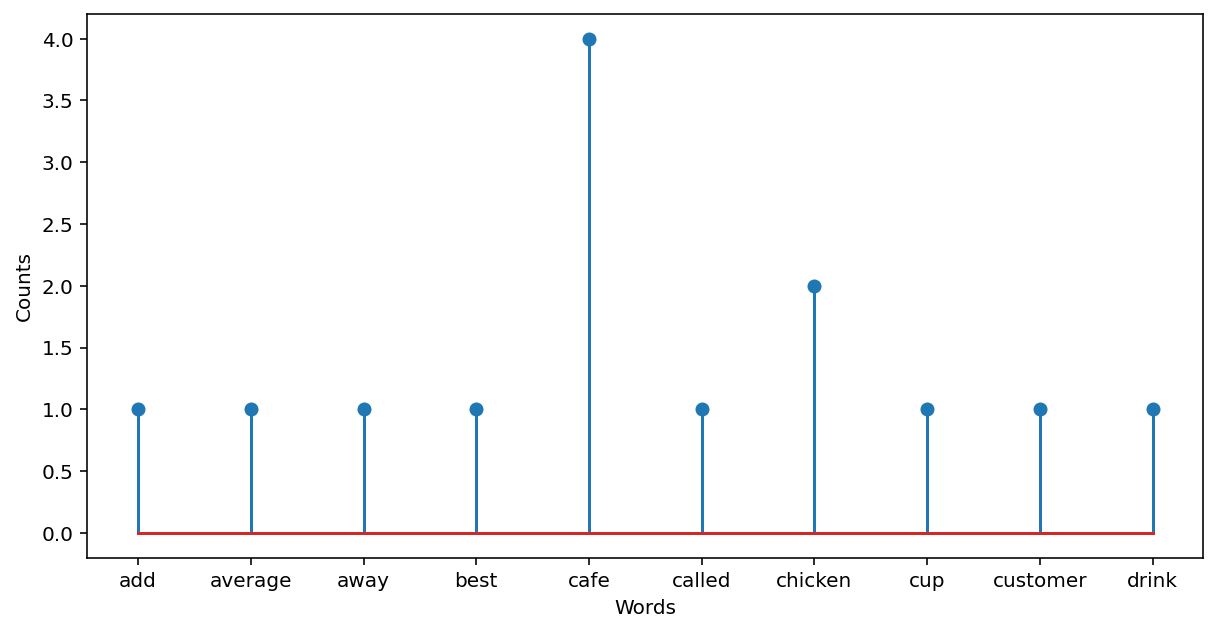

In [ ]:
#<SOL>
# Generar el BoW
corpus_bow = [D.doc2bow(doc) for doc in corpus_prec]

#Limpiamos aquellas reviews que se han quedado vacías y quitamos tambien esa entrada de nuestros output
y = [output  for review, output in zip(corpus_bow, y) if review ]
corpus_bow = [review for review in corpus_bow if review]


# Analizamos un doc al azar y lo representamos gráficamente
n_doc=0
print('Original document (after cleaning):')
print(corpus_prec[n_doc])
print('Sparse vector representation (first 10 components):')
print(corpus_bow[n_doc][:10])
print('Word counts for the document (first 10 components):')
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[n_doc][:10]]
print(list_word_counts)

(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()
#</SOL>

## 2.3 Representación TF-IDF
Obtenga la representación TF-IDF de las reviews preprocesadas.

Original document (after cleaning):
['coconut', 'fish', 'cafe', 'fantastic', 'five', 'star', 'fish', 'cafe', 'five', 'u', 'drove', 'lunch', 'hour', 'lucky', 'u', 'customer', 'line', 'nice', 'good', 'sign', 'ur', 'working', 'clock', 'ordered', 'póke', 'photo', 'wa', 'outstanding', 'love', 'fresh', 'tuna', 'coconut', 'might', 'best', 'every', 'order', 'see', 'coworkers', 'ordered', 'chicken', 'taco', 'steak', 'taco', 'photo', 'fish', 'taco', 'cup', 'chowder', 'add', 'ipas', 'soft', 'drink', 'averaged', '15', 'tried', 'friend', 'josh', 'fish', 'taco', 'wa', 'great', 'four', 'star', 'review', 'georgie', 'well', 'non', 'fish', 'group', 'thought', 'wa', 'average', 'okay', 'go', 'place', 'called', 'coconut', 'fish', 'cafe', 'order', 'chicken', 'steak', 'sorry', 'lol', 'step', 'away', 'meat', 'taco', 'guy', 'one', 'get', 'hurt', 'order', 'poke', 'fish', 'shrimp', 'taco', 'fall', 'love', 'coconut', 'fish', 'cafe', 'enjoy']
Sparse TFIDF vector representation (first 10 components):
[(0, 0.0675246

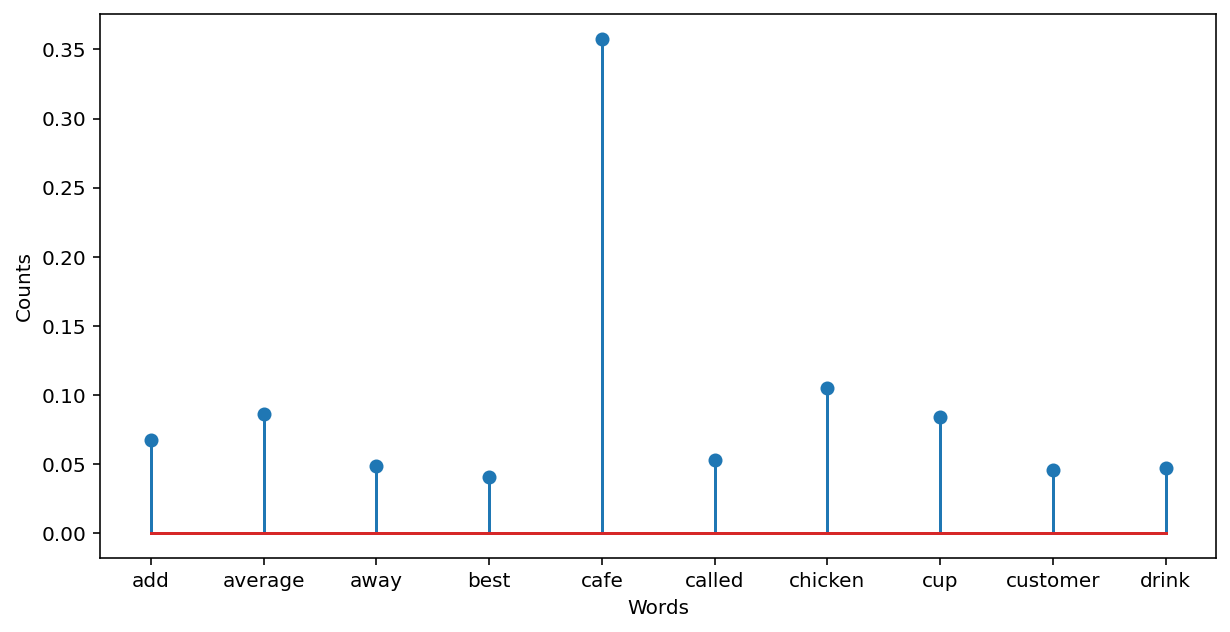

In [ ]:
#<SOL>
from gensim.models import TfidfModel
# fit TFIDF model for all the corpus
model = TfidfModel(corpus_bow)  
corpus_tfidf = model[corpus_bow]

n_doc=0
print('Original document (after cleaning):')
print(corpus_prec[n_doc])
print('Sparse TFIDF vector representation (first 10 components):')
print(corpus_tfidf[n_doc][:10])
print('Word counts for the document (first 10 components):')
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[n_doc][:10]]
print(list_word_counts)
print('TF-IDF for the document (first 10 components):')
list_tfidf = [(D[doc_tfidf[0]], doc_tfidf[1]) for doc_tfidf in corpus_tfidf[n_doc][:10]]
print(list_tfidf)

#Plot Tf-IDF
(words, counts) = zip(*list_tfidf)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()
#</SOL>

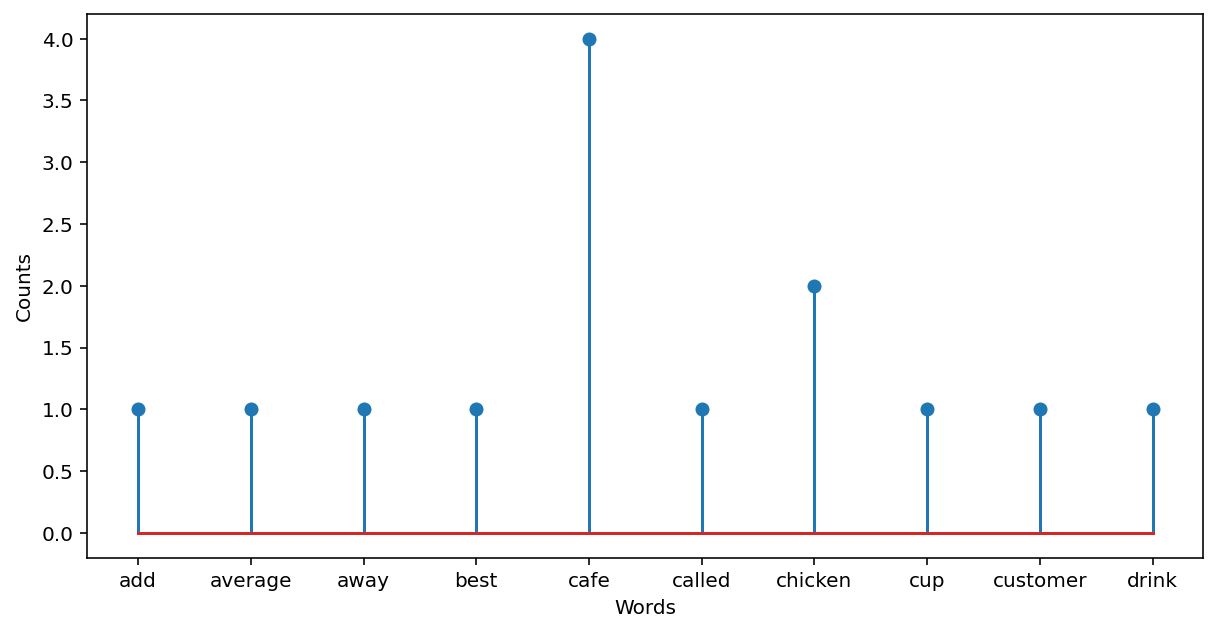

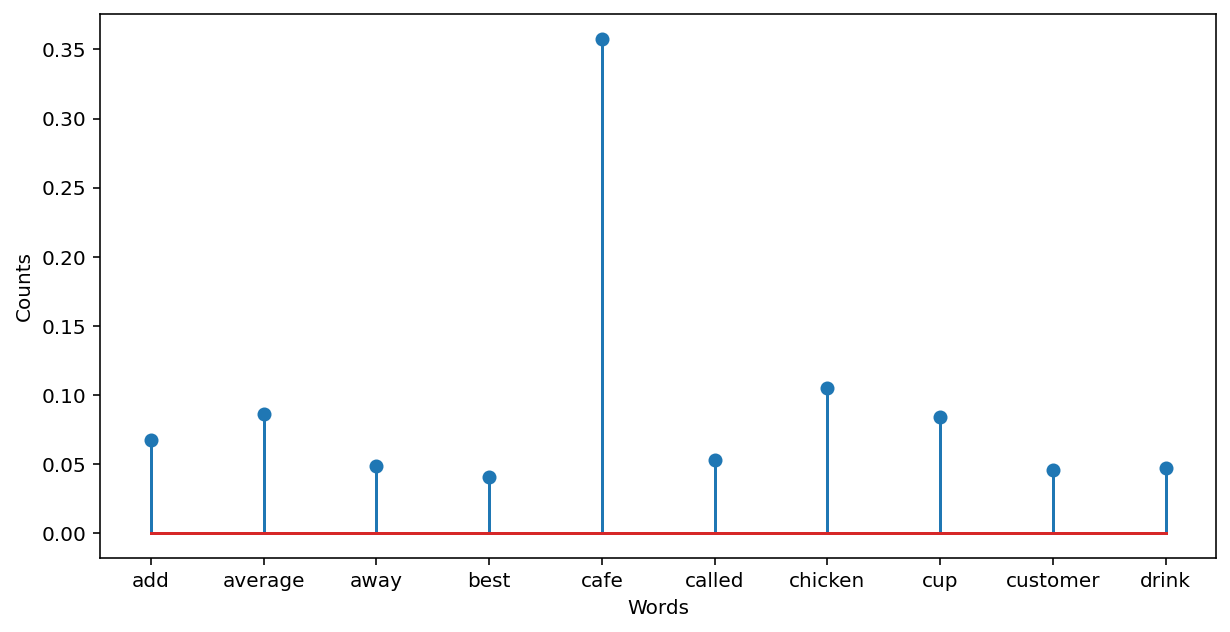

In [ ]:
#Plot BoW
(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

#Plot Tf-IDF
(words, counts) = zip(*list_tfidf)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

## 2.4 Conversión a matrices sparse

Use la función `corpus2csc` para convertir las representaciones BoW y TF-IDF a matrices sparse con las que poder trabajar en las siguientes secciones.

In [ ]:
from gensim.matutils import corpus2csc
#<SOL>
n_tokens = len(D)
num_docs = len(corpus_bow)
# Convert BoW representacion
corpus_bow_sparse = corpus2csc(corpus_bow, num_terms=n_tokens, num_docs=num_docs).T
print("-"*200)
print(corpus_bow_sparse[0, :10])
print("-"*200)
# Convert TFIDF representacion
corpus_tfidf_sparse = corpus2csc(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T
print("-"*200)
print(corpus_tfidf_sparse[0, :10])
print("-"*200)
#</SOL>

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	4.0
  (0, 5)	1.0
  (0, 6)	2.0
  (0, 7)	1.0
  (0, 8)	1.0
  (0, 9)	1.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  (0, 0)	0.06752469854846366
  (0, 1)	0.08575784572404099
  (0, 2)	0.048713784997020705
  (0, 3)	0.04079051584180326
  (0, 4)	0.35778275057435943
  (0, 5)	0.05302373736002795
  (0, 6)	0.10494184114286968
  (0, 7)	0.08410728664830583
  (0, 8)	0.04537694360748187
  (0,

# Ejercicio 3. Modelos de predicción con BoW y TFIDF  (2 ptos)

Utilice las representaciones vectoriales obtenidas anteriormente para predecir la puntuación asociada a cada review. Para esta predicción utilice y compare un regresor tipo k-NN (con la distancia coseno) y un modelo *Ridge Regression* lineal.

Para el entrenamiento y evalaución de estos modelos considere:
* 40% de los datos para entrenar y 60% para testear
* Aplique un proceso de CV con 5 fold para validar adecuadamente los parámetros libres de cada modelo
* Evalúe las prestaciones finales en términos de R2.

Además, no se olvide de normalizar los datos 
si lo considera necesario, en cuyo caso justifique la normalización aplicada.

Por último, compare y comente los resultados obtenidos. ¿Qué representación de los datos da mejores resultados? ¿Qué regresor funciona mejor? ¿A qué se cree que puede deberse?

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge


from scipy import sparse


def normalize_sparse_vector(s):
  norm_s = np.array(np.sqrt(s.multiply(s).sum(1)))
  pos_zero = np.where(np.sqrt(s.multiply(s).sum(1))==0)[0]
  norm_s[pos_zero] = 1
  return s.multiply(sparse.csr_matrix(1/norm_s))


def compare_models(input_data):
  X_train, X_test, Y_train, Y_test = train_test_split(input_data, y, test_size=0.6, random_state=15)
  knn_params = {
      'n_neighbors': np.arange(1, 50, 5)   
  }
  ridge_params = {
      'alpha': np.arange(0, 1.5, 0.01)    
  }

  # define search
  gs_ridge = GridSearchCV(Ridge(), ridge_params, cv=5, n_jobs=-1)
  gs_knn = GridSearchCV(KNeighborsRegressor(metric='cosine'), knn_params, verbose=0, cv=5, n_jobs=-1)

  grids = [gs_knn, gs_ridge]

  # Dictionary of pipelines and classifier types for ease of reference
  grid_dict = {0: 'Knn Regression', 1: 'Ridge Regression'}

  # Fit the grid search objects
  print('Performing model optimizations...')
  best_r2 = 0.0
  best_clf = 0
  best_gs = ''
  for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])	
    # Fit grid search	
    gs.fit(X_train, Y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)

    y_pred = gs.predict(X_train)
    # Train data score of model with best params
    print('Train set R2-score for best params: %.3f ' % r2_score(Y_train, y_pred))
    
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set R2-score for best params: %.3f ' % r2_score(Y_test, y_pred))
    # Track best (highest test score) model
    if r2_score(Y_test, y_pred) > best_r2:
      best_r2 = r2_score(Y_test, y_pred)
      best_gs = gs
      best_clf = idx
  print('\nClassifier with best test set R2-score: %s' % grid_dict[best_clf])

# With Bow data
print("-"*100)
print ("Knn y Ridge with Bow")
compare_models(corpus_bow_sparse)

# With BoW Normalized data
print("-"*100)
print ("Knn y Ridge with Norm Bow")
corpus_bow_sparse_norm = normalize_sparse_vector(corpus_bow_sparse)
compare_models(corpus_bow_sparse_norm)

# With TF data
print("-"*100)
print ("Knn y Ridge with TF-IDF")
compare_models(corpus_tfidf_sparse)

# With TF Normalized data
print("-"*100)
print ("Knn y Ridge with Norm TF-IDF")
corpus_tfidf_sparse_norm = normalize_sparse_vector(corpus_tfidf_sparse)
compare_models(corpus_tfidf_sparse_norm)

----------------------------------------------------------------------------------------------------
Knn y Ridge with Bow
Performing model optimizations...

Estimator: Knn Regression
Best params: {'n_neighbors': 26}
Train set R2-score for best params: 0.459 
Test set R2-score for best params: 0.371 

Estimator: Ridge Regression
Best params: {'alpha': 1.49}
Train set R2-score for best params: 0.860 
Test set R2-score for best params: -0.414 

Classifier with best test set R2-score: Knn Regression
----------------------------------------------------------------------------------------------------
Knn y Ridge with Norm Bow
Performing model optimizations...

Estimator: Knn Regression
Best params: {'n_neighbors': 26}
Train set R2-score for best params: 0.459 
Test set R2-score for best params: 0.371 

Estimator: Ridge Regression
Best params: {'alpha': 0.98}
Train set R2-score for best params: 0.774 
Test set R2-score for best params: 0.586 

Classifier with best test set R2-score: Ridge Reg

Se han normalizado los datos ya que vamos a usar las librerias de sklearn y éstas solo permiten el uso de la distancia euclidea. Como hemos aprendido no deseamos que nuestra medida de distancia dependa de la longitud de los vectores. 

Por esta razón se suele usar la "distancia" coseno y se normalizan los datos para que la magnitud del vector no importe.

A priori no debería ser necesario normalizar el TF-IDF. Este conjunto de datos ya se considera normalizado por el propio proceso y se ha comprobado que no hay diferencias por usar datos normalizados o no.

Tanto para el entrenamiento con BoW como con TF, el modelo Ridge se ha mostrado mejor usando datos normalizados. La explicación se debe a que Ridge pondera con mayores pesos las palabras mas representativas.

Cabe mencionar que con datos no normalizados, el método Ridge sobreentrena demasiado y ofrece resultados muy pobres para el conjunto de Test.


# Ejercicio 4. *Embeddings* (2 ptos)

En este ejercicio vamos a utilizar algunos de los *embeddings* que hemos visto para reducir la dimensión de las representaciones vectoriales obtenidas anteriomente. En concreto, vamos a usar dos tipos de *embeddings* en esta sección:
* *Principal Compmente Analysis* (PCA)
* El basado en K-means

Para simplicar este análisis, a partir de ahora solo vamos a trabajar con la representación TF-IDF. Así que obtenga para los vectores TF-IDF el *embedding* PCA asociado y utilicelo para ver las prestaciones que nos daría el modelo de *ridge regression* lineal. Obtenga estas prestaciones para un *embedding* de tamaño $2, 10, 25, 50 y 100$ y analice como influye el tamaño del *embedding* en las prestaciones del regresor.

Por último, para el *embedding* de dimensión 2 haga una representación del mismo, donde cada *review* será un punto en este espacio bidimensional y asígnele diferentes colores según las puntuaciones que tenga asociadas (por ejemplo, las *reviews* con puntuación 1 las visualizamos en rojo, las *reviews* con puntuación 2 las visualizamos en azul, ...). 

Finalmente, analice los resultados obtenidos.


## 4.1 *Embeddings* con PCA

El método PCA de sklearn no trabaja con matrices sparse, así que para poder aplicar esta transformación de los datos, tendrá que comenzar transformando la representación sparse TF-IDF a una representación densa (para ello puede usar el método `.toarray()` de las matrices sparse).

El número de componentes de PCA es 100
Score train 0.631. Score test 0.571

----------------------------------------------------------------------------------------------------


,params,mean_cv_test_score,rank_cv_test_score
4,"{'PCA__n_components': 100, 'Ridge__alpha': 1.2}",0.549263,1
3,"{'PCA__n_components': 50, 'Ridge__alpha': 1.2}",0.527666,2
2,"{'PCA__n_components': 25, 'Ridge__alpha': 1.2}",0.487211,3
1,"{'PCA__n_components': 10, 'Ridge__alpha': 1.2}",0.379119,4
0,"{'PCA__n_components': 2, 'Ridge__alpha': 1.2}",0.324517,5


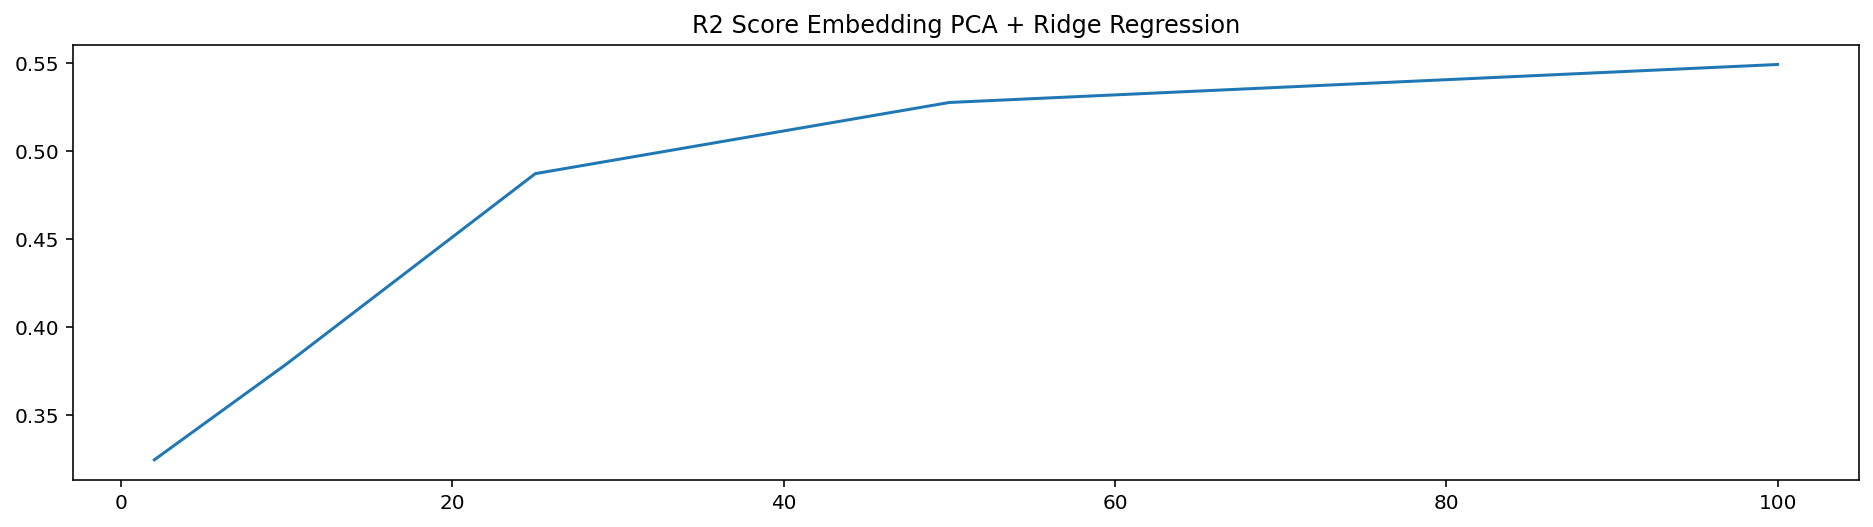

In [ ]:
#<SOL>
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

corpus_tfidf_dense = corpus_tfidf_sparse_norm.toarray()
X_train, X_test, Y_train, Y_test = train_test_split(corpus_tfidf_dense, y, test_size=0.6)

# Define pipeline steps
pipe = Pipeline([('PCA', PCA()),
                 ('Ridge', Ridge())])
#num_components = np.linspace(2,1000, 8, dtype = int)
num_components =  [2, 10, 25, 50, 100]
pca_params = {
    'PCA__n_components': num_components,
    'Ridge__alpha': [1.2]   
}

# define search
gs_pca = GridSearchCV(pipe, pca_params, cv=5)
gs_pca.fit(X_train, Y_train)

# Test
score_train = gs_pca.score(X_train,Y_train)
score_test = gs_pca.score(X_test,Y_test)

print("El número de componentes de PCA es {0:d}".format(gs_pca.best_estimator_['PCA'].n_components))
print("Score train {0:.3f}. Score test {1:.3f}\n".format(score_train, score_test))

print("-"*100)
score = pd.DataFrame(gs_pca.cv_results_)[['params','mean_test_score','rank_test_score']].sort_values(by='rank_test_score')
score.rename(columns={'mean_test_score':'mean_cv_test_score','rank_test_score':'rank_cv_test_score'},inplace=True)
display(score)

# Revisarlo
plt.figure(figsize = (16,4))
plt.plot(num_components, score['mean_cv_test_score'][::-1])
plt.title('R2 Score Embedding PCA + Ridge Regression')
plt.show()
#</SOL>


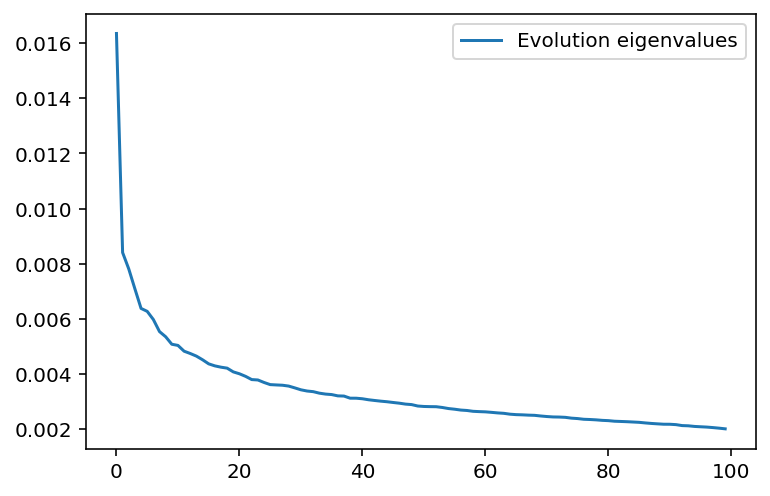

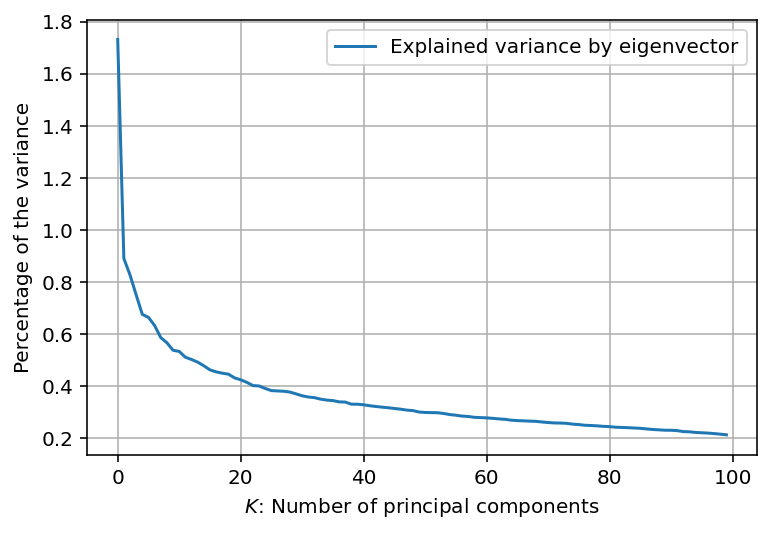

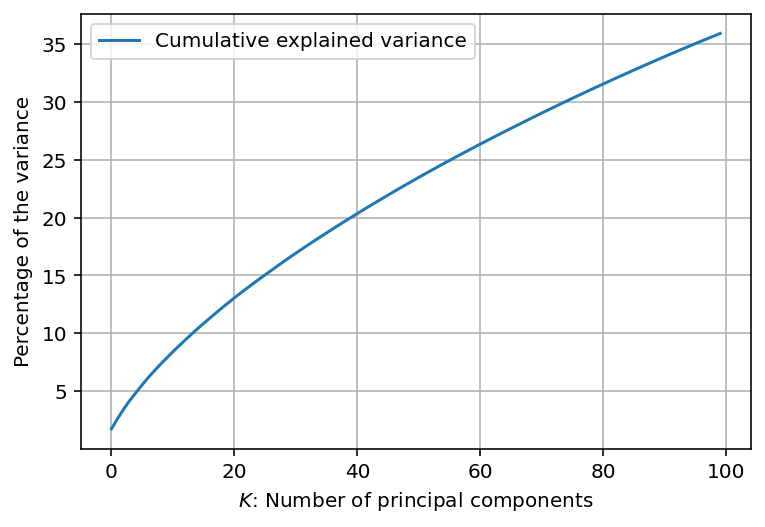

In [ ]:
# 1. Analyze eigenvalues
eigenvalues = gs_pca.best_estimator_['PCA'].explained_variance_
plt.figure()
plt.plot(eigenvalues, label='Evolution eigenvalues')
plt.legend()
plt.show()

# 2.- Compute an estimation of the variance in data using the training set

data_variance = np.sum(np.var(corpus_tfidf_dense,0))

# 3.- plot the explain variance of each eigenvector and cummulative sum of the sorted eigenvalues divided by the total variance of the data
# 3.1.- express the y-axis in percentage

plt.figure()
plt.plot(100*eigenvalues/data_variance, label='Explained variance by eigenvector')
plt.grid()
plt.xlabel('$K$: Number of principal components')
plt.ylabel('Percentage of the variance')
plt.legend()
plt.show()

plt.figure()
plt.plot(100*np.cumsum(eigenvalues)/data_variance, label='Cumulative explained variance')
plt.grid()
plt.xlabel('$K$: Number of principal components')
plt.ylabel('Percentage of the variance')
plt.legend()
plt.show()

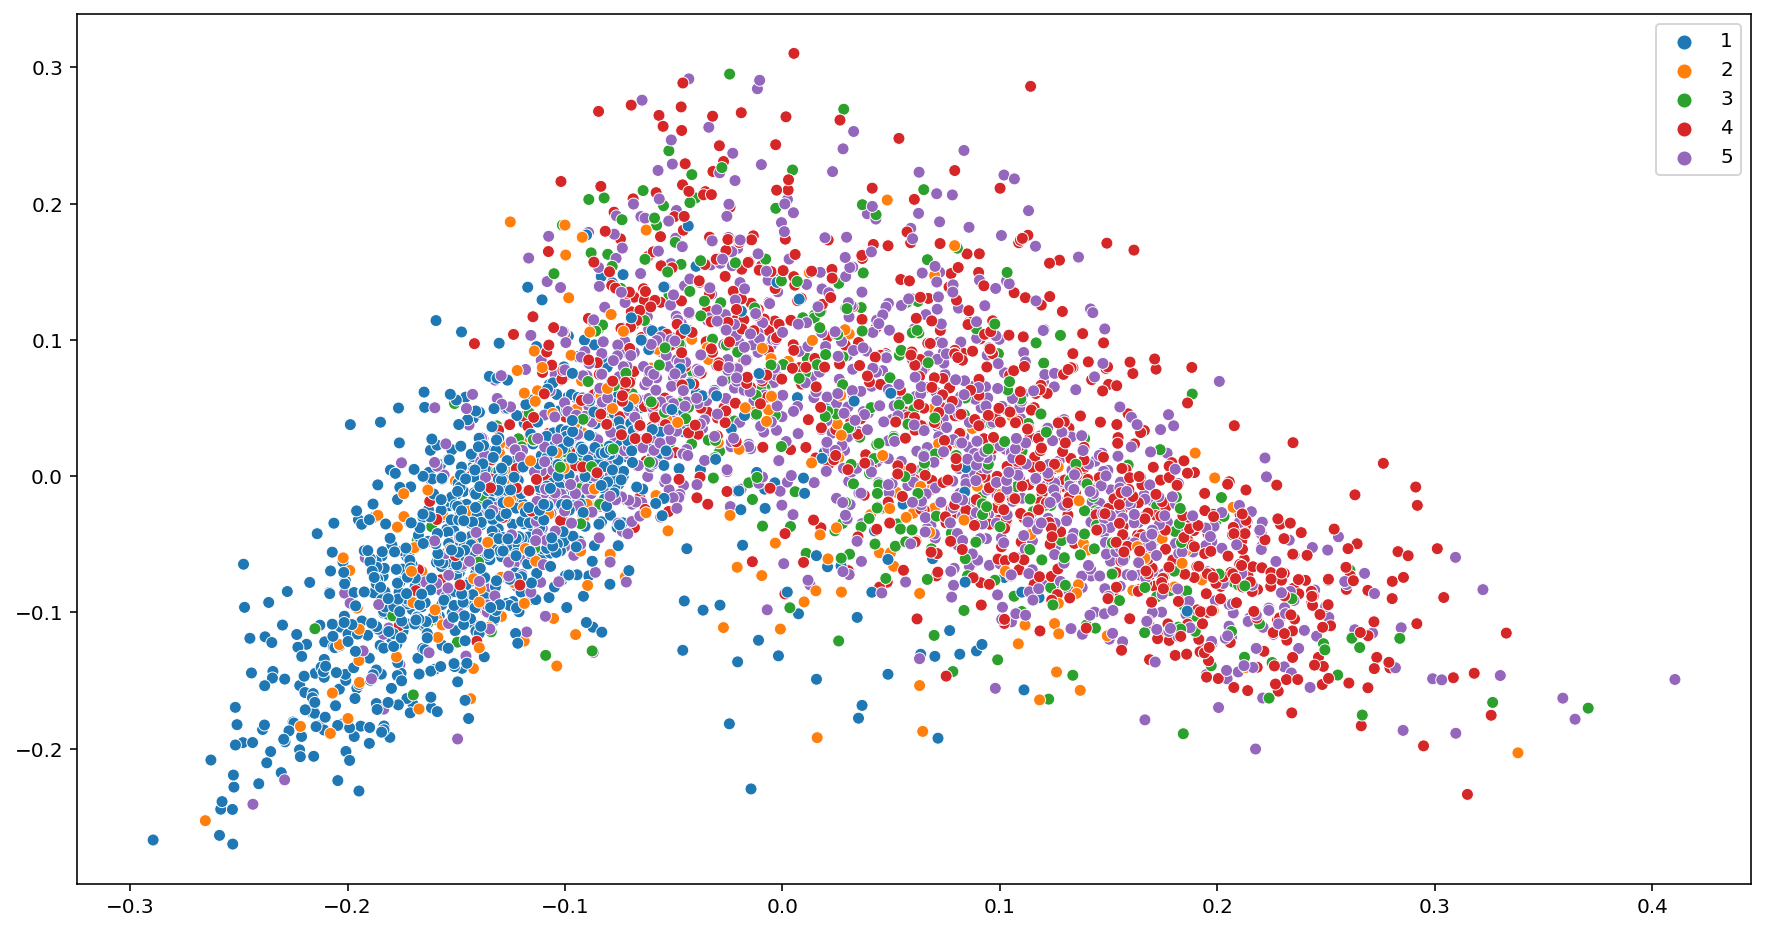

In [ ]:
#<SOL>
my_pca = PCA(n_components=2).fit(corpus_tfidf_dense)
X_pca = my_pca.transform(corpus_tfidf_dense)

import seaborn as sns
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_pca[:,0], y= X_pca[:,1], hue=y, palette='tab10')


## 4.2 *Embeddings* con K-means

El método K-means sí admite la representación *sparse* de los datos, así que no hace falta que en este caso convierta sus datos a formato denso.

El número de componentes del embedding es 2
R2-score train 0.149. R2-score test 0.140

El número de componentes del embedding es 10
R2-score train 0.264. R2-score test 0.250

El número de componentes del embedding es 25
R2-score train 0.335. R2-score test 0.320

El número de componentes del embedding es 50
R2-score train 0.393. R2-score test 0.361

El número de componentes del embedding es 100
R2-score train 0.501. R2-score test 0.460



<function matplotlib.pyplot.show>

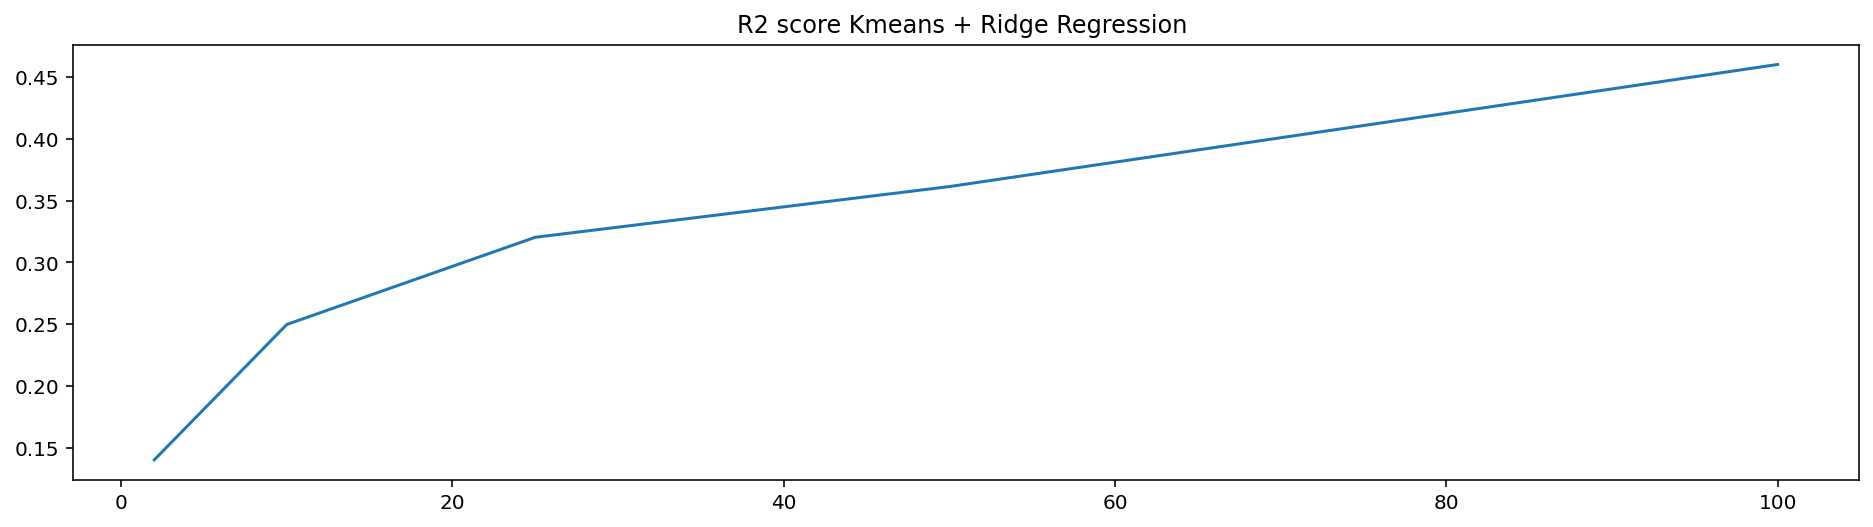

In [ ]:
#<SOL>
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Define pipeline steps
pipe = Pipeline([('Ridge', Ridge())])

kmeans_params = {
    'Ridge__alpha': [1.2]   
}
#lista_k = np.linspace(2,500, 8, dtype = int)
lista_k = [2,10,25,50,100]

corpus_tfidf_dense = corpus_tfidf_sparse_norm.toarray()
X_train, X_test, Y_train, Y_test = train_test_split(corpus_tfidf_dense, y, test_size=0.6)

results = []
for K in lista_k:
  kmeans = KMeans(n_clusters=K) # Definimos objeto con parámetros por defecto
  kmeans.fit(X_train) # Entrenamos k-means
  # Get centers
  centers = kmeans.cluster_centers_

  # Embeddings are distances to centers
  X_kmeans_train = pairwise_distances(X_train, centers)
  X_kmeans_test = pairwise_distances(X_test, centers)
  
  # CV with GridSearchCV
  grid_ridge = GridSearchCV(pipe, kmeans_params, cv=5)
  grid_ridge.fit(X_kmeans_train, Y_train)

  print("El número de componentes del embedding es {0:d}".format(K))
  print("R2-score train {0:.3f}. R2-score test {1:.3f}\n".format(grid_ridge.score(X_kmeans_train,Y_train), grid_ridge.score(X_kmeans_test,Y_test)))  
  results.append([K, grid_ridge.score(X_kmeans_test,Y_test)])

plt.figure(figsize = (16,4))
plt.plot(*zip(*results))
plt.title('R2 score Kmeans + Ridge Regression ')
plt.show

#</SOL>

# Ejercicio 5. *Embeddings* con *Word2Vec* (2 ptos)

En esta última sección vamos a obtener la representación *Word2Vec* para obtener un *embedding* de las palabras de nuestro corpus de *reviews* y luego utilizaremos esta representación para predecir la puntuación de cada *review*.

Para ello, vaya resolviendo los siguientes apartados:

## 5.1 *Word2Vec* de las palabras del corpus de *reviews*

Comience entrenando una red neuronal del tipo word2vec para obtener una *embedding* de tamaño 200 con un tamaño de ventana de 5 y eliminado las palabras que aparecen en menos de 20 documentos.

Extraiga del modelo el *embedding* aprendido y use el algoritmo t-SNE para representar este  *embedding* en dos dimensiones.

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
#<SOL>
model = Word2Vec(corpus_prec, sg = 1, size = 200, window=5, min_count=20)
print(model)

# Create numpy array with all word2vec
embeddings = model.wv.vectors 
#embeddings = np.array([model.wv[w] for w in list(model.wv.vocab)])
embeddings[0,:]

tsne = TSNE()
embed_tsne = tsne.fit_transform(embeddings)

fig, ax = plt.subplots(figsize=(16, 16))
for idx, word in enumerate((model.wv.vocab)):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(word, (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)
#</SOL>

Output hidden; open in https://colab.research.google.com to view.

## 5.2 Análisis del  *Word2Vec* 

Utilice el método `.most_similar` del word2vec que acaba de entrenar para encontrar las palabras más similares a los términos `breakfast`, `great` y  `wrong`. ¿Cree que el modelo ha sido capaz de aprender la semantica del cospus?

In [ ]:
#<SOL>
print(model.wv.most_similar('breakfast'))
print(model.wv.most_similar('great'))
print(model.wv.most_similar('wrong'))
#</SOL>

[('lunch', 0.8722573518753052), ('brunch', 0.860005795955658), ('hh', 0.8594944477081299), ('buffet', 0.8425593376159668), ('hawaiian', 0.839725136756897), ('ayce', 0.8146824240684509), ('dinner', 0.8099910020828247), ('weekday', 0.8035244941711426), ('carte', 0.8014753460884094), ('bouchon', 0.7991615533828735)]
[('awesome', 0.7971488237380981), ('amazing', 0.734013020992279), ('wonderful', 0.7311229705810547), ('excellent', 0.7293338179588318), ('fantastic', 0.7230915427207947), ('incredible', 0.7211238145828247), ('outstanding', 0.7146574258804321), ('good', 0.6945042610168457), ('superb', 0.6893714666366577), ('impeccable', 0.6892367005348206)]
[('bos', 0.8429673910140991), ('hurry', 0.8414500951766968), ('nasty', 0.8397128582000732), ('nope', 0.8193648457527161), ('necessary', 0.817960262298584), ('screw', 0.8179185390472412), ('anyway', 0.8149735927581787), ('otherwise', 0.8072150945663452), ('complain', 0.8054085969924927), ('needing', 0.8048223853111267)]


## 5.3 Representación de las *reviews* a partir del *Word2Vec* 

En esta sección vamos a representar cada documento con el `word2vec` promedio de las palabras de cada *review*. Para facilitarte este cálculo las siguientes celdas de código generan una lista con el vocabulario de las *reviews* y otra lista con el vocabulario del *embedding*. A partir de ellas:
1. Construya una matriz con los embeddings para las palabras del vocabulario de las *reviews*. Llame a esta matriz `embeddings_vocab`
2. Genere un *embedding* por *review* como el producto escalar del BoW de esa review y `embeddings_vocab`. De este modo estará calculando un promedio ponderado de los *embeddings* para las palabras en esa review.
3. Normalice el *embedding* de cada documento a norma 1 para compensar el efecto de los docuemntos más largos frente a los docuemntos con menos palabras. Para ello puede usar la función `normalize_dense_vector` que le damos a continuación.

Si lo desea, con ayuda del t-SNE, puede representar estos embeddings en un espacio bidimensional.


In [ ]:
def normalize_dense_vector(s):
  norm1 = np.linalg.norm(s, axis =1)
  norm1[norm1==0] =1
  return (s.T/norm1).T

In [ ]:
# Vocabulario de las reviews
vocab_reviews = list(D.values()) 
print(len(vocab_reviews))
print(vocab_reviews)

1000
['add', 'average', 'away', 'best', 'cafe', 'called', 'chicken', 'cup', 'customer', 'drink', 'enjoy', 'every', 'fantastic', 'fish', 'five', 'four', 'fresh', 'friend', 'get', 'go', 'good', 'great', 'group', 'guy', 'hour', 'line', 'lol', 'love', 'lucky', 'lunch', 'meat', 'might', 'nice', 'okay', 'one', 'order', 'ordered', 'outstanding', 'photo', 'place', 'review', 'see', 'shrimp', 'sign', 'soft', 'sorry', 'star', 'steak', 'step', 'taco', 'thought', 'tried', 'wa', 'well', 'working', 'amazing', 'appreciate', 'arrived', 'business', 'chance', 'close', 'come', 'could', 'date', 'decor', 'desert', 'dinner', 'dish', 'entire', 'food', 'la', 'meal', 'perfectly', 'potato', 'prepared', 'restaurant', 'rock', 'seated', 'show', 'soup', 'stopped', 'super', 'table', 'truly', 'vega', 'want', 'window', 'yummy', 'actually', 'almost', 'always', 'amount', 'authentic', 'bad', 'ca', 'came', 'cuisine', 'decent', 'enough', 'even', 'event', 'ever', 'finally', 'first', 'foot', 'got', 'help', 'home', 'instead', 

In [ ]:
# Vocabulario del embedding
vocab_emb = list(model.wv.vocab)
print(len(vocab_emb))
print(vocab_emb)

3175
['coconut', 'fish', 'cafe', 'fantastic', 'five', 'star', 'u', 'drove', 'lunch', 'hour', 'lucky', 'customer', 'line', 'nice', 'good', 'sign', 'working', 'ordered', 'photo', 'wa', 'outstanding', 'love', 'fresh', 'tuna', 'might', 'best', 'every', 'order', 'see', 'chicken', 'taco', 'steak', 'cup', 'add', 'soft', 'drink', '15', 'tried', 'friend', 'great', 'four', 'review', 'well', 'non', 'group', 'thought', 'average', 'okay', 'go', 'place', 'called', 'sorry', 'lol', 'step', 'away', 'meat', 'guy', 'one', 'get', 'hurt', 'poke', 'shrimp', 'fall', 'enjoy', 'stopped', 'prime', 'tonight', '9', 'business', 'meeting', 'arrived', 'seated', 'table', 'close', 'window', 'could', 'bellagio', 'fountain', 'show', 'background', 'whiskey', 'chance', 'truly', 'appreciate', 'beauty', 'restaurant', 'decor', 'upscale', 'power', 'dinner', 'date', 'squash', 'soup', 'potato', 'banana', 'tart', 'desert', 'entire', 'meal', 'amazing', 'dish', 'perfectly', 'prepared', 'super', 'yummy', 'want', 'la', 'vega', 'come

In [ ]:
#<SOL>
# 1
embeddings_vocab = model.wv[vocab_reviews]
print(len(embeddings_vocab))

# 2
def scalarProduct(vocab, review):
  result = []
  if not review:
      return
  word_num, freq = zip(*review)
  emb_review = np.dot(vocab[[word_num]].T, freq)
  return emb_review

embeddings_vocab = model.wv[vocab_reviews]
embeddings_reviews = [scalarProduct(embeddings_vocab, review)  for review in corpus_bow]


# 3
embeddings_reviews_norm = normalize_dense_vector(np.array(embeddings_reviews))
print(embeddings_reviews_norm[0])
#</SOL>

1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


[ 0.01274377  0.01838226  0.12166499  0.07044807  0.15819045  0.11326999
 -0.11325875  0.06329306 -0.00562058  0.00966984 -0.02758002  0.04485381
 -0.09304867 -0.04217101  0.03336455  0.11692124  0.10673841 -0.03772777
  0.07349223  0.02981313  0.08240837  0.07810721 -0.00985791 -0.12359353
  0.06159388 -0.04084467 -0.03815459  0.00203565 -0.02664414 -0.04360633
 -0.01204593 -0.00803828 -0.04746364  0.17685876  0.02189771 -0.01862901
 -0.1512278  -0.06096667  0.02612229  0.02113883 -0.03736959 -0.05863344
  0.00033681  0.10133014 -0.02013465 -0.00128707  0.11367912 -0.00897889
 -0.01301031  0.03736348  0.0169348   0.06169605 -0.03153042  0.03795988
  0.03887965  0.00131586  0.0429864  -0.04742178  0.14653949 -0.01206555
  0.02164991  0.07810956  0.11614698 -0.01647783 -0.0226631  -0.01744236
 -0.11385908  0.0021053   0.00997187 -0.03199298 -0.06894608 -0.12835338
  0.09734416  0.00057551  0.05144577 -0.02444333  0.0546606   0.09062745
  0.1368836  -0.00189902  0.0342734  -0.06233132  0

## 5.4 Estimación de los *ratings* a partir de la representación  *Word2Vec* 

Utilice la representación anterior de cada *review* para estimar su *rating* mediante un modelo *Ridge Regresion* lineal.

In [ ]:
#<SOL>
X_train, X_test, Y_train, Y_test = train_test_split(embeddings_reviews_norm, y, test_size = 0.6, random_state=42)

ridge_params = {
      'alpha': np.arange(0, 1.5, 0.01)    
  }

# define search
gs_ridge = GridSearchCV(Ridge(), ridge_params, cv=5, n_jobs=-1)
gs_ridge.fit(X_train, Y_train)
print("Best Ridge-Word2Vec Score: " ,gs_ridge.score(X_test, Y_test) , " parameter: ", gs_ridge.best_params_)
print("R2 Score with the training data {0:.3f}".format(gs_ridge.score(X_train, Y_train)))
print("R2 Score with the test data {0:.3f}".format(gs_ridge.score(X_test,Y_test)))

#</SOL>

Best Ridge-Word2Vec Score:  0.5473243961746835  parameter:  {'alpha': 0.05}
R2 Score with the training data 0.605
R2 Score with the test data 0.547


# Ejercicio 6 (EXTRA). Utilización de modelos *Word2Vec* preentrenados 

Repita el ejercicio anterior, pero utilizando el *Word2Vec* preentrenado de Google News. La siguiente celda de código carga este modelo para su uso y extrae los *embeddings*. Tenga en cuenta que este modelo preentrenado no tiene porque incluir todas las palabras del vocabulario de las *reviews*, así que para las palabras que no estén, simplemente no las tenga en cuenta para generar el *embedding* promedio de la *review*.

In [ ]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[================================================--] 96.4% 1602.3/1662.8MB downloaded


In [ ]:
# get embeddings
embeddings = wv.vectors 

# Vocabulario del embedding
vocab_emb = list(wv.vocab)
print(len(vocab_emb))
print(vocab_emb[:10])

3000000
['</s>', 'in', 'for', 'that', 'is', 'on', '##', 'The', 'with', 'said']


In [ ]:
#<SOL>
vocab_reviews = list(D.values()) 
print(len(vocab_reviews))

empty_embedding = np.zeros(len(embeddings[0]))
google_embedding_vocab = [wv[word] if word in vocab_emb else empty_embedding for word, index in D.token2id.items()]

google_embedding = [scalarProduct(np.array(google_embedding_vocab), review)  for review in corpus_bow if review != [] ]


print(len(google_embedding))

google_embedding_norm = normalize_dense_vector(np.array(google_embedding))

X_train, X_test, Y_train, Y_test = train_test_split(google_embedding_norm, y, test_size = 0.6, random_state=42)

ridge_params = {
      'alpha': np.arange(0, 1.5, 0.01)    
  }

# define search
gs_ridge = GridSearchCV(Ridge(), ridge_params, cv=5, n_jobs=-1)
gs_ridge.fit(X_train, Y_train)

print("Test R2 Score: " ,gs_ridge.score(X_test, Y_test))

#</SOL>

1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


3532
Test R2 Score:  0.5767657495616869
